<a href="https://colab.research.google.com/github/foster333/busta/blob/master/iscsdatascience_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                        TITLE  

1-  Formulazione del problema

2- Methodo da usare per la risoluzione del problema

3- Carichiamo le diverse Libraria da usare.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import tree
import seaborn as sn
from matplotlib.legend_handler import HandlerLine2D
np.random.seed(0)#???

               4-  Carico e lettura del dato

In [ ]:
#############################################################################################
############################## Montiamo il dataset da Google drive a Colab ##################
#############################################################################################

path= "/content/drive/MyDrive/Colab Notebooks/classification_dataset.csv"
''' una volta caricato il dataset su google drive e una volta fatto il mounting su colab possiamo estrare il percorso indicando dov'è puthon può andare a prendere i dato
 messo sotto "path".
 '''

' una volta caricato il dataset su google drive e una volta fatto il mounting su colab possiamo estrare il percorso indicando dov\'è puthon può andare a prendere i dato\n messo sotto "path".\n '

In [196]:
# apriamo sotto un dataframe il file contenente i dati da usare
df = pd.read_csv(path, sep='\t')


5- data glancing 

In [197]:
print(df.shape) # vediamo il numero di righe e colone del nostro dataframe
print(df.info) # uno sguardo al dato
print(df.columns) # vediamo i nomi delle colone, le variabili.

(6775, 25)
<bound method DataFrame.info of         ID PROVINCIA  ... LONGITUDINE             OUTPUT
0        0        BS  ...   45.751381                B&B
1        1        BS  ...   45.469485                B&B
2        2        BG  ...   45.704158  Case_Appartamenti
3        3        MN  ...   45.165506       4_a_5_Stelle
4        4        MI  ...   45.457177  Case_Appartamenti
...    ...       ...  ...         ...                ...
6770  6770        MI  ...   45.473103  Case_Appartamenti
6771  6771        MI  ...   45.461061  Case_Appartamenti
6772  6772        BG  ...   45.690735  Case_Appartamenti
6773  6773        BG  ...   45.779892  Case_Appartamenti
6774  6774        SO  ...   46.405137  Case_Appartamenti

[6775 rows x 25 columns]>
Index(['ID', 'PROVINCIA', 'COMUNE', 'LOCALITA', 'CAMERE', 'SUITE', 'LETTI',
       'BAGNI', 'PRIMA_COLAZIONE', 'IN_ABITATO', 'SUL_LAGO', 'VICINO_ELIPORTO',
       'VICINO_AEREOPORTO', 'ZONA_CENTRALE', 'VICINO_IMP_RISALITA',
       'ZONA_PERIFERIC

In [201]:
df.head(10) # facciamoci un idea del dataset guardando alle 10 prime righe di tutte le varibili.

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
0,0,BS,PERTICA BASSA,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.373501,45.751381,B&B
1,1,BS,DESENZANO DEL GARDA,NaN,4,0,8,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.538947,45.469485,B&B
2,2,BG,BERGAMO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,9.665355,45.704158,Case_Appartamenti
3,3,MN,MANTOVA,BOCCABUSA,93,2,194,96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",NaN,"Numero sale congressi 3,Congressi capacita' Mi...",10.828175,45.165506,4_a_5_Stelle
4,4,MI,MILANO,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.151637,45.457177,Case_Appartamenti
5,5,LC,DERVIO,NaN,3,0,10,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Accesso a vetture pri...",NaN,"Inglese,Francese,Spagnolo",NaN,NaN,9.307951,46.076507,B&B
6,6,CR,CREMONA,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"Biciclette per ospiti,Parco o giardino,Sala te...",NaN,NaN,NaN,NaN,10.028811,45.132638,B&B
7,7,BS,TREMOSINE,NaN,2,0,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.774328,45.793520,Case_Appartamenti
8,8,SO,LIVIGNO,NaN,8,0,25,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.136316,46.537801,Case_Appartamenti
9,9,MI,PERO,NaN,2,0,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Accesso a mezzi pubblici,Parco o giardino,Post...","American express,Visa,Master Card,Bancomat,Car...","Francese,Spagnolo",NaN,NaN,9.069780,45.519138,B&B


In [202]:
df.tail(10) # ora facciamo la stessa cosa guardando le 10 ultime righe.

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
6765,6765,MN,MONZAMBANO,NaN,2,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Accesso a vetture private,NaN,"Inglese,Francese,Tedesco",NaN,NaN,10.663781,45.400174,B&B
6766,6766,MI,MILANO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accettazione animali domestici,NaN,NaN,NaN,NaN,9.196980,45.482605,Case_Appartamenti
6767,6767,BS,ISEO,NaN,1,0,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.056193,45.659818,B&B
6768,6768,BS,SIRMIONE,NaN,23,0,44,23,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Bar,Giochi per bambini,Parco o giardino,Accett...","American express,Visa,Master Card","Inglese,Francese,Tedesco",Piscina scoperta,NaN,10.605859,45.497071,1_a_3_Stelle
6769,6769,BG,BERGAMO,NaN,2,0,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.659076,45.688413,Case_Appartamenti
6770,6770,MI,MILANO,NaN,46,0,50,46,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Access. diversamente abili parziale,NaN,Inglese,NaN,NaN,9.155438,45.473103,Case_Appartamenti
6771,6771,MI,MILANO,NaN,19,0,25,13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.187997,45.461061,Case_Appartamenti
6772,6772,BG,BERGAMO,NaN,1,0,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.668696,45.690735,Case_Appartamenti
6773,6773,BG,RIVA DI SOLTO,NaN,2,0,6,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Access. diversamente abili totale,Accettazione...",NaN,NaN,NaN,NaN,10.038911,45.779892,Case_Appartamenti
6774,6774,SO,CAMPODOLCINO,Fraciscio,4,0,20,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,9.366251,46.405137,Case_Appartamenti


In [193]:
df.dtypes #???

ID                       int64
PROVINCIA               object
COMUNE                  object
LOCALITA                object
CAMERE                   int64
SUITE                    int64
LETTI                    int64
BAGNI                    int64
PRIMA_COLAZIONE          int64
IN_ABITATO             float64
SUL_LAGO               float64
VICINO_ELIPORTO        float64
VICINO_AEREOPORTO      float64
ZONA_CENTRALE          float64
VICINO_IMP_RISALITA    float64
ZONA_PERIFERICA        float64
ZONA_STAZIONE_FS       float64
ATTREZZATURE_VARIE      object
CARTE_ACCETTATE         object
LINGUE_PARLATE          object
SPORT                   object
CONGRESSI               object
LATITUDINE             float64
LONGITUDINE            float64
OUTPUT                  object
dtype: object

Abbiamo visto che il nostro dataset è costituto da 6775 righe o osservazioni e 25 colone o variabili.

In [ ]:
df.info

<bound method DataFrame.info of         ID PROVINCIA  ... LONGITUDINE             OUTPUT
0        0        BS  ...   45.751381                B&B
1        1        BS  ...   45.469485                B&B
2        2        BG  ...   45.704158  Case_Appartamenti
3        3        MN  ...   45.165506       4_a_5_Stelle
4        4        MI  ...   45.457177  Case_Appartamenti
...    ...       ...  ...         ...                ...
6770  6770        MI  ...   45.473103  Case_Appartamenti
6771  6771        MI  ...   45.461061  Case_Appartamenti
6772  6772        BG  ...   45.690735  Case_Appartamenti
6773  6773        BG  ...   45.779892  Case_Appartamenti
6774  6774        SO  ...   46.405137  Case_Appartamenti

[6775 rows x 25 columns]>

In [ ]:
df.describe() # Vediamo un veloce riassunto della statistica descrittiva di tutte le variabili 

,ID,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,LATITUDINE,LONGITUDINE
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653
std,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.describe(include = "all")# ora vediamo la statistica descrittiva includendo gli eventuali valori nulli e NaN

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
count,6775.000000,6775.0,6775.0,6775.0,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.0,6775.0,6775.0,6775.0,6775.0,6775.000000,6775.000000,6775.0
unique,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0
top,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,NaN,NaN,3.0
freq,NaN,2910.0,2910.0,2910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910.0,2910.0,2910.0,2910.0,2910.0,NaN,NaN,2910.0
mean,2.833653,NaN,NaN,NaN,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,2.833653,NaN,NaN,NaN,NaN,NaN,2.833653,2.833653,NaN
std,1.236413,NaN,NaN,NaN,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,1.236413,NaN,NaN,NaN,NaN,NaN,1.236413,1.236413,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
50%,3.000000,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,NaN
75%,4.000000,NaN,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,NaN


Si nota la presenza dei valori nulli e dei NaN. Questo può essere un problema per il nostro analisi ed è da trattare.

6- lavorazione del dataset e sistemazione dei NaN

In [200]:
df["PROVINCIA"].unique()

array(['BS', 'BG', 'MN', 'MI', 'LC', 'CR', 'SO', 'CO', 'VA', 'MB', 'PV',
       'LO'], dtype=object)

In [203]:
df.dtypes

ID                       int64
PROVINCIA               object
COMUNE                  object
LOCALITA                object
CAMERE                   int64
SUITE                    int64
LETTI                    int64
BAGNI                    int64
PRIMA_COLAZIONE          int64
IN_ABITATO             float64
SUL_LAGO               float64
VICINO_ELIPORTO        float64
VICINO_AEREOPORTO      float64
ZONA_CENTRALE          float64
VICINO_IMP_RISALITA    float64
ZONA_PERIFERICA        float64
ZONA_STAZIONE_FS       float64
ATTREZZATURE_VARIE      object
CARTE_ACCETTATE         object
LINGUE_PARLATE          object
SPORT                   object
CONGRESSI               object
LATITUDINE             float64
LONGITUDINE            float64
OUTPUT                  object
dtype: object

In [ ]:
print(df.OUTPUT.unique())
propout= df["OUTPUT"].value_counts(sort=1)
propout  #???proportion

['B&B' 'Case_Appartamenti' '4_a_5_Stelle' '1_a_3_Stelle' 'Campeggio']


Case_Appartamenti    2910
B&B                  1737
1_a_3_Stelle         1504
4_a_5_Stelle          489
Campeggio             135
Name: OUTPUT, dtype: int64

In [ ]:
BB = ["B&B"]
Case = ['Case_Appartamenti']
quac = ['4_a_5_Stelle']
unods = ['1_a_3_Stelle']
Campeggio = ['Campeggio']
df[df.OUTPUT.isin(BB)] =1
df[df.OUTPUT.isin(Case)] =3
df[df.OUTPUT.isin(quac)] =5
df[df.OUTPUT.isin(unods)] =4
df[df.OUTPUT.isin(Campeggio)] =2
df.OUTPUT
df.head(20)

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,VICINO_IMP_RISALITA,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
0,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1.0,1.0,1
1,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1.0,1.0,1
2,3,3,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3.0,3.0,3
3,5,5,5,5,5,5,5,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5.0,5.0,5
4,3,3,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3.0,3.0,3
5,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1.0,1.0,1
6,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1.0,1.0,1
7,3,3,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3.0,3.0,3
8,3,3,3,3,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3.0,3.0,3
9,1,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1.0,1.0,1


In [ ]:
Y =   df["OUTPUT"].values
Y = Y.astype("int")
Y

array([1, 1, 3, ..., 3, 3, 3])

In [ ]:
#df= df.dropna

In [ ]:
Y= df["OUTPUT"].values
Y

array([1, 1, 3, ..., 3, 3, 3], dtype=object)

In [ ]:
# let define the dependent variable Y and the independent variables X.
X = df.drop(labels=["OUTPUT"], axis=1)
print(df.head)
print(X)
print(Y)

<bound method NDFrame.head of       ID PROVINCIA COMUNE LOCALITA  ...  CONGRESSI  LATITUDINE  LONGITUDINE  OUTPUT
0      1         1      1        1  ...          1         1.0          1.0       1
1      1         1      1        1  ...          1         1.0          1.0       1
2      3         3      3        3  ...          3         3.0          3.0       3
3      5         5      5        5  ...          5         5.0          5.0       5
4      3         3      3        3  ...          3         3.0          3.0       3
...   ..       ...    ...      ...  ...        ...         ...          ...     ...
6770   3         3      3        3  ...          3         3.0          3.0       3
6771   3         3      3        3  ...          3         3.0          3.0       3
6772   3         3      3        3  ...          3         3.0          3.0       3
6773   3         3      3        3  ...          3         3.0          3.0       3
6774   3         3      3        3  ...       

In [ ]:
print(X)

      ID PROVINCIA COMUNE LOCALITA  ...  SPORT  CONGRESSI  LATITUDINE  LONGITUDINE
0      1         1      1        1  ...      1          1         1.0          1.0
1      1         1      1        1  ...      1          1         1.0          1.0
2      3         3      3        3  ...      3          3         3.0          3.0
3      5         5      5        5  ...      5          5         5.0          5.0
4      3         3      3        3  ...      3          3         3.0          3.0
...   ..       ...    ...      ...  ...    ...        ...         ...          ...
6770   3         3      3        3  ...      3          3         3.0          3.0
6771   3         3      3        3  ...      3          3         3.0          3.0
6772   3         3      3        3  ...      3          3         3.0          3.0
6773   3         3      3        3  ...      3          3         3.0          3.0
6774   3         3      3        3  ...      3          3         3.0          3.0

[67

In [ ]:
#df["4train"] = np.random.uniform(0, 1, len(df))  <= .70
#df.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 20)
Y = Y.astype("int")
print(X_test)
Y_test

      ID PROVINCIA COMUNE LOCALITA  ...  SPORT  CONGRESSI  LATITUDINE  LONGITUDINE
766    1         1      1        1  ...      1          1         1.0          1.0
1277   4         4      4        4  ...      4          4         4.0          4.0
2133   1         1      1        1  ...      1          1         1.0          1.0
2563   3         3      3        3  ...      3          3         3.0          3.0
3998   4         4      4        4  ...      4          4         4.0          4.0
...   ..       ...    ...      ...  ...    ...        ...         ...          ...
3200   3         3      3        3  ...      3          3         3.0          3.0
4696   3         3      3        3  ...      3          3         3.0          3.0
3763   1         1      1        1  ...      1          1         1.0          1.0
2506   3         3      3        3  ...      3          3         3.0          3.0
6192   3         3      3        3  ...      3          3         3.0          3.0

[20

array([1, 4, 1, ..., 1, 3, 3])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4742, 24)
(2033, 24)
(4742,)
(2033,)


In [ ]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      ID PROVINCIA COMUNE LOCALITA  ...  SPORT  CONGRESSI  LATITUDINE  LONGITUDINE
5425   2         2      2        2  ...      2          2         2.0          2.0
1909   1         1      1        1  ...      1          1         1.0          1.0
3810   3         3      3        3  ...      3          3         3.0          3.0
1740   1         1      1        1  ...      1          1         1.0          1.0
3032   5         5      5        5  ...      5          5         5.0          5.0
...   ..       ...    ...      ...  ...    ...        ...         ...          ...
3915   5         5      5        5  ...      5          5         5.0          5.0
1428   1         1      1        1  ...      1          1         1.0          1.0
6537   4         4      4        4  ...      4          4         4.0          4.0
4367   3         3      3        3  ...      3          3         3.0          3.0
2522   1         1      1        1  ...      1          1         1.0          1.0

[47

In [ ]:
# ?? dataframe train datasettest


In [ ]:
# creazione di un modello random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=30)# random state?
# fitting the model
model =model.fit(X_train, Y_train)
model
#len(model.estimators_)
#model.estimators_

RandomForestClassifier(random_state=30)

[Text(418.5, 475.65000000000003, 'X[18] <= 1.5\ngini = 0.692\nsamples = 2978\nvalue = [1198, 89, 2084, 998, 373]'),
 Text(279.0, 339.75, 'gini = 0.0\nsamples = 742\nvalue = [1198, 0, 0, 0, 0]'),
 Text(558.0, 339.75, 'X[13] <= 3.5\ngini = 0.563\nsamples = 2236\nvalue = [0, 89, 2084, 998, 373]'),
 Text(279.0, 203.85000000000002, 'X[6] <= 2.5\ngini = 0.079\nsamples = 1388\nvalue = [0, 89, 2084, 0, 0]'),
 Text(139.5, 67.94999999999999, 'gini = 0.0\nsamples = 56\nvalue = [0, 89, 0, 0, 0]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 1332\nvalue = [0, 0, 2084, 0, 0]'),
 Text(837.0, 203.85000000000002, 'X[0] <= 4.5\ngini = 0.396\nsamples = 848\nvalue = [0, 0, 0, 998, 373]'),
 Text(697.5, 67.94999999999999, 'gini = 0.0\nsamples = 623\nvalue = [0, 0, 0, 998, 0]'),
 Text(976.5, 67.94999999999999, 'gini = 0.0\nsamples = 225\nvalue = [0, 0, 0, 0, 373]')]

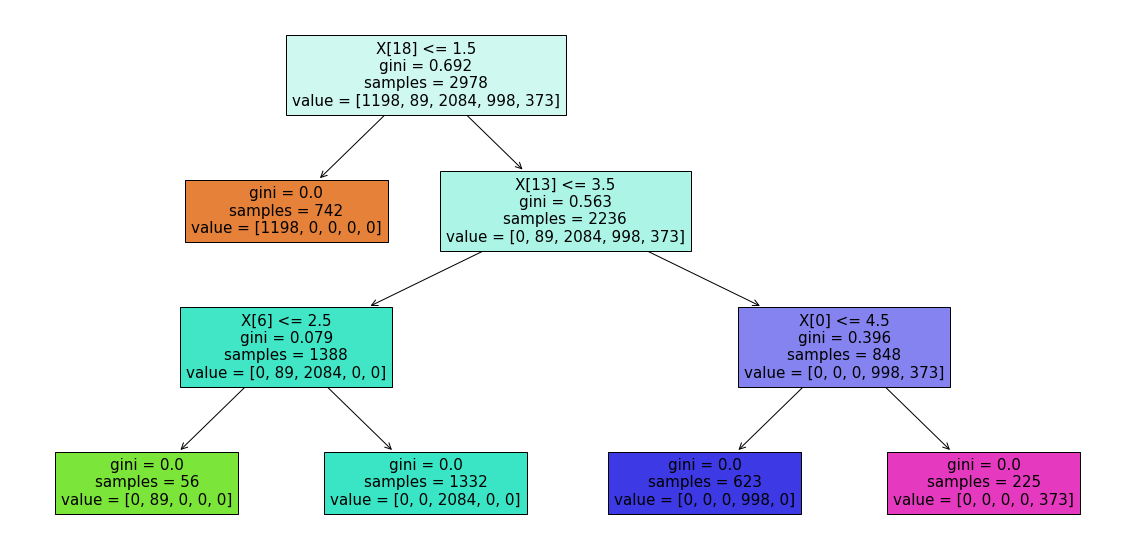

In [ ]:
# plot decision trees
plt.figure(figsize=(20, 10))
tree.plot_tree(model.estimators_[19], filled= True)

In [ ]:
for i in range (len(model.estimators_)):
  print(tree.export_text(model.estimators_[i]))

|--- feature_2 <= 1.50
|   |--- class: 0.0
|--- feature_2 >  1.50
|   |--- feature_21 <= 3.50
|   |   |--- feature_20 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_20 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_21 >  3.50
|   |   |--- feature_3 <= 4.50
|   |   |   |--- class: 3.0
|   |   |--- feature_3 >  4.50
|   |   |   |--- class: 4.0

|--- feature_14 <= 1.50
|   |--- class: 0.0
|--- feature_14 >  1.50
|   |--- feature_15 <= 3.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_15 >  3.50
|   |   |--- feature_4 <= 4.50
|   |   |   |--- class: 3.0
|   |   |--- feature_4 >  4.50
|   |   |   |--- class: 4.0

|--- feature_14 <= 1.50
|   |--- class: 0.0
|--- feature_14 >  1.50
|   |--- feature_13 <= 3.50
|   |   |--- feature_23 <= 2.50
|   |   |   |--- class: 1.0
|   |   |--- feature_23 >  2.50
|   |   |   |--- class: 2.0
|   |--- feature_13 >  3.50
|   |   |--- feature_22 <= 4.50
| 

Text(69.0, 0.5, 'Truth')

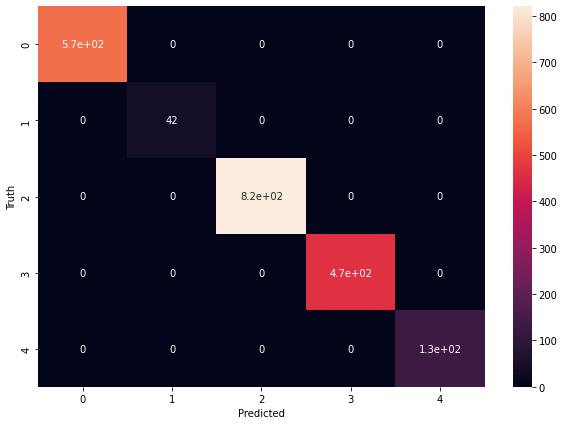

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(conmatr, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# ora dobbiamo fare une predizione applicando il modello di classificazione "trainato" sul test set
Yhat = model.predict(X_test)
Yhat

array([1, 4, 1, ..., 1, 3, 3])

In [ ]:
#  Vediamo quanto importante sono le variabili indipendenti nel nostro modello
Xvar = list(X.columns)
Ximp = pd.Series(model.feature_importances_, index = Xvar).sort_values(ascending=False)
Ximp


SUL_LAGO               0.078779
ZONA_CENTRALE          0.076108
ZONA_PERIFERICA        0.074127
SPORT                  0.061269
PRIMA_COLAZIONE        0.061049
CAMERE                 0.060567
ID                     0.056703
LETTI                  0.054317
VICINO_IMP_RISALITA    0.054127
BAGNI                  0.048622
ATTREZZATURE_VARIE     0.047637
PROVINCIA              0.044050
COMUNE                 0.041106
VICINO_ELIPORTO        0.030211
LONGITUDINE            0.029517
ZONA_STAZIONE_FS       0.028669
LOCALITA               0.026660
IN_ABITATO             0.023980
CARTE_ACCETTATE        0.022987
VICINO_AEREOPORTO      0.020761
CONGRESSI              0.020049
SUITE                  0.019803
LATITUDINE             0.016425
LINGUE_PARLATE         0.002474
dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conmatr = confusion_matrix(Y_test, Yhat,)
score=accuracy_score(Y_test, Yhat)
print(conmatr)
print(score)

[[572   0   0   0   0]
 [  0  42   0   0   0]
 [  0   0 821   0   0]
 [  0   0   0 467   0]
 [  0   0   0   0 131]]
1.0


In [ ]:
pd.crosstab(Y_test, Yhat, rownames=["Categoriainiziale"], colnames=["Categoriafinale"])

Categoriafinale,1,2,3,4,5
Categoriainiziale,,,,,
1,572,0,0,0,0
2,0,42,0,0,0
3,0,0,821,0,0
4,0,0,0,467,0
5,0,0,0,0,131
